## Kernel_svm


### 1) Get the dataset

In [30]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt


# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("No. of datapoints : ", len(dataset))
dataset[:10]

No. of datapoints :  400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### 2) Separate the dep and indep variables into a numpy array

We are only going to consider **age** and **salary** as independent variables to predict purchases.

In [31]:
X = dataset.iloc[:,[2,3]].values 
y = dataset.iloc[:, 4].values

### 3) Splitting into training and test set

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 4) Feature scaling

Is feature scaling needed for this algorithm? 

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainS = sc.fit_transform(X_train)
X_testS = sc.transform(X_test)

### 5) Predict using SVM kernel functions

In [34]:
from sklearn.svm import SVC

In [35]:
classifier = SVC(kernel='rbf',random_state=0)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)
pd.DataFrame(np.hstack((X_test, y_pred.reshape(-1,1),y_test.reshape(-1,1))),columns=["Age","Salary","Purch_predict","Purch_actual"])[:10] #hstack takes 2D arrays

,Age,Salary,Purch_predict,Purch_actual
0,30,87000,0,0
1,38,50000,0,0
2,35,75000,0,0
3,30,79000,0,0
4,35,50000,0,0
5,27,20000,0,0
6,31,15000,0,0
7,36,144000,1,1
8,18,68000,0,0
9,47,43000,1,0


### 6) Printing Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[64  4]
 [ 3 29]]


### 7) Visualizing the class boundry

#### RBF Kernel

(With features scaled)

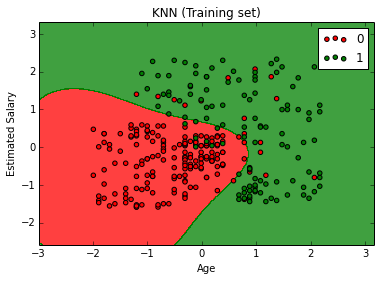

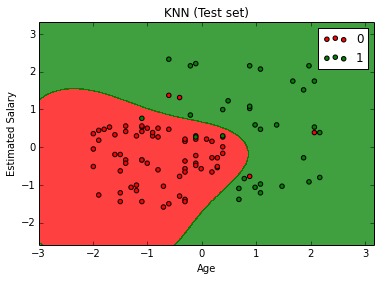

In [38]:
import plot_binary as pb

plt = pb.plot_binary(X_trainS,y_train,classifier)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Polynomial kernel (Degree 1)

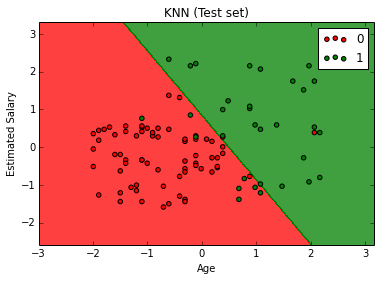

[[66  2]
 [ 8 24]]


In [39]:
classifier = SVC(kernel='poly',degree=1,random_state=0)
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

cm = confusion_matrix(y_test,y_pred)
print(cm)

#### Polynomial kernel (Higher Degrees are not so good) 

Degree 3

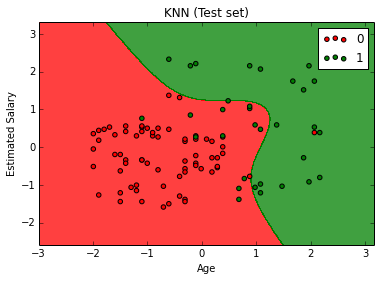

[[67  1]
 [13 19]]


In [40]:
classifier = SVC(kernel='poly',degree=3,random_state=0)
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

cm = confusion_matrix(y_test,y_pred)
print(cm)

Degree 13

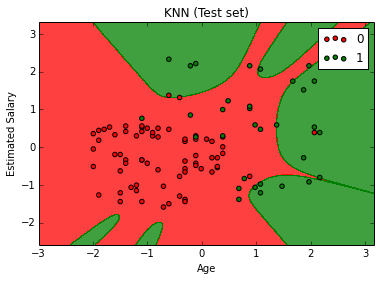

[[66  2]
 [16 16]]


In [41]:
classifier = SVC(kernel='poly',degree=13,random_state=0)
classifier.fit(X_trainS,y_train)
y_pred = classifier.predict(X_testS)

plt = pb.plot_binary(X_testS,y_test,classifier)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

cm = confusion_matrix(y_test,y_pred)
print(cm)